# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Table 0.1: Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0       3   2920     6252     440               223           709
1  112151  29627    18148   16745              4948          8550
2   16117  46197    92780    1026             40827          2944


Table 0.2: Chosen samples percentile ranks


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
95     0.3  42.7     58.6    16.6              20.7          39.5
181  100.0  98.4     89.3    98.4              81.1          99.1
85    73.2  99.5    100.0    36.8             100.0          90.0


Heat Map


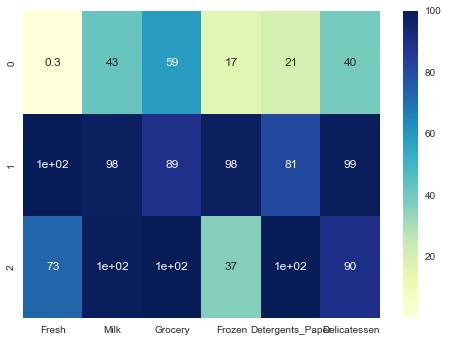

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [95, 181, 85]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Table 0.1: Chosen samples of wholesale customers dataset:"
display(samples)

import seaborn as sns

# Look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print "\nTable 0.2: Chosen samples percentile ranks"
display(pcts)

# Visualize percentiles with heatmap
print "\nHeat Map"
sns.heatmap(pcts.reset_index(drop=True), annot=True, cmap='YlGnBu');

Note

In order to find samples that are different I picked samples that are at the extreme value of some feature. Customer 95 and 181 are the ones that have min and max Fresh spending, respectively. Cutomer 85 is the one that has maximum Milk. This is confirmed by looking at the ranks (Table 0.2) and the heat map. It turns out that ustomer 85 is also the one that has max Grocery and Detergents_Papaer. In hindsight, although these are reasonable ways to get customers that are different, it also picks extreme data points, which by definition are not particularly representative of the(bulk of the) distribution.

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

customer 95: Deli/Cafe: low value, possibly a combination of low quantity and low cost, almost no fresh food, moslty milk and groceries. However, the lowest value of fresh (=3) is not met with the lowest value of milk (=55). Thus customer customer 95 is probably selecting this establishment for milk and some groceries.

customer 181: Food market: large quantity of fresh produce. This customer is a big spender, however it is selective. While being the largest spender in fresh products (10x the average) he does not buy proportionately as much milk (6x) or grocery (2x).

customer 85: Supermarket: about same value between grocery and detergents_paper. This is the customer that spent most on detergents (13x the average) but is also the one who spent most on groceries (12x the average)


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Table 1.1: Predictability of feature given based on all other features, i.e. 'Fresh' as described by 'Milk', 'Grocery', etc.


R^2
Fresh             -0.252470
Milk               0.365725
Grocery            0.602802
Frozen             0.253973
Detergents_Paper   0.728655
Delicatessen     -11.663687


Table 1.2: Correlation of Features in Original Order


Fresh     Milk    Grocery     Frozen Detergents_Paper  \
Fresh                   0.10051 -0.0118539   0.345881        -0.101953   
Milk                              0.728335   0.123994         0.661816   
Grocery                                    -0.0401927         0.924641   
Frozen                                                       -0.131525   
Detergents_Paper                                                         
Delicatessen                                                             

                 Delicatessen  
Fresh                 0.24469  
Milk                 0.406368  
Grocery              0.205497  
Frozen               0.390947  
Detergents_Paper    0.0692913  
Delicatessen


Table 1.3: Correlation of Features in 'Clustered' Order


Detergents_Paper   Grocery      Milk      Fresh     Frozen  \
Detergents_Paper                   0.924641  0.661816  -0.101953  -0.131525   
Grocery                                      0.728335 -0.0118539 -0.0401927   
Milk                                                     0.10051   0.123994   
Fresh                                                              0.345881   
Frozen                                                                        
Delicatessen                                                                  

                 Delicatessen  
Detergents_Paper    0.0692913  
Grocery              0.205497  
Milk                 0.406368  
Fresh                 0.24469  
Frozen               0.390947  
Delicatessen

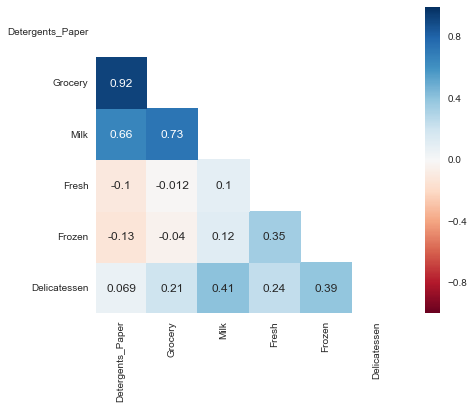

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from pandas import DataFrame, Series
r2 = []
F = DataFrame(index=data.columns)

for i, col in enumerate(data.columns):
    # print "Considering column '%s' " % col
    y = data[col]
    new_data = data.drop([col], axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data.values, y, test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    clf = DecisionTreeRegressor(random_state=0)
    clf.fit(X_train, y_train)
    z = pd.Series(clf.feature_importances_, index=new_data.columns, name='Expl. ' + col)
    F = pd.concat([F, z], axis=1)

    # TODO: Report the score of the prediction using the testing set
    r2.append(clf.score(X_test, y_test))
    # print "R2 = ", r2[-1]

r2 = pd.Series(r2, index=data.columns)
print "Table 1.1: Predictability of feature given based on all other features, i.e. 'Fresh' as described by 'Milk', 'Grocery', etc."
display(pd.DataFrame(r2, columns=['R^2']))

corr = data.corr()
for i in range(data.shape[1]):
    for j in range(i,data.shape[1]):
        corr.ix[j, i] = ''
print "\nTable 1.2: Correlation of Features in Original Order"
display(corr)

ix_reord = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
corr_reord = data[ix_reord].corr()
for i in range(data.shape[1]):
    for j in range(i,data.shape[1]):
        corr_reord.ix[j, i] = ''
print "\nTable 1.3: Correlation of Features in 'Clustered' Order"
display(corr_reord)


corr = data[ix_reord].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')

# display(F)

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
Looping over all features indicates that the most highly explainable features are: Detergents_Paper (r<sup>2</sup> = 0.73) and Grocery (r<sup>2</sup> = 0.60), see Table 1.1. Chances are that either of these could be dropped.

A simpler correlation matrix confirms that Detergents_Paper is highly correlated to Grocery and Milk. In addition, Grocery and Milk are also highly correlated among themselves.

This suggests that there is a cluster composed of 3 features: Detergents_Paper, Grocery, and Milk. Then there are 'fringe' features Fresh, Frozen, and Delicatessen which are relatively lowly correlated, among themselves and with the clustered features.

From a narrative point of view, Detergents_Paper, Grocery, and Milk are relatively common items that can be found in many different establishments. Their high correlation could express the fact that those are more 'basic necessities' which are bought often and in generic stores. If this were true, chances are that they would not be particularly descriptive in distinguishing the type of establishment when considered all together. One could siffice. Quite different from say Fresh which would probably indicates a specific store. That said, one of the three features would be necessary to help the algorithm normalize the scale of the purchase, i.e. there are customers who by a lot more than others. One of these three variables would help establish the generic size. Alternatively one could convert the data into z-scores and remove the size effect that way.

To summarize, if I had to reduce the features I would define a 'Bulk' feature = Detergents_Paper + Grocery + Milk, which could be thought of a scaled version of the mean (3x) so that the sum of purchases per csutomer would not change in this transformed data. I would then keep the other features. All in all this would reduce the features from 6 to 4.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

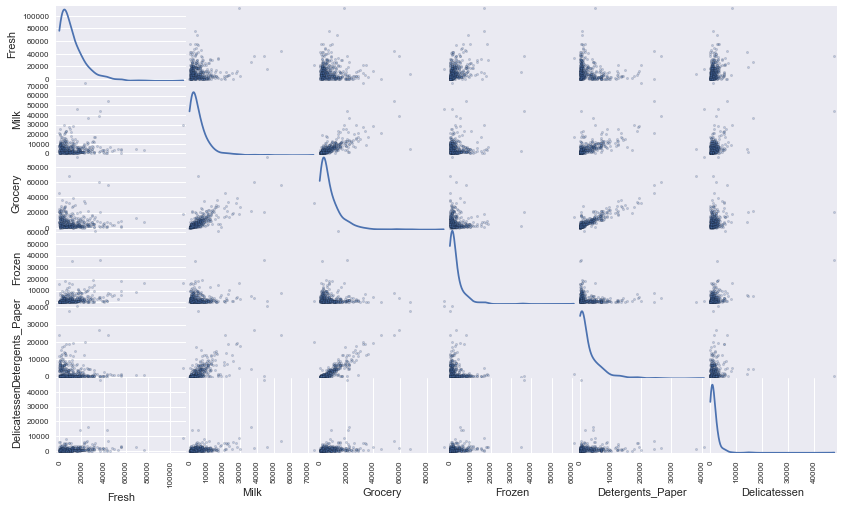

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The scatter plot reflects the analysis above. The cluster of 3 features: Detergents_Paper, Grocery, and Milk show good correlation, i.e. the mutual scatter plots show points being close to a line.

The distributions are non-Gaussian. This is by necessity since prices are positive. Most prices cluster around low values. A more appropriate distribution would be Log-Normal. If there were no big spenders the distributions would look more Normal, although they would never really be Normal.

Interestingly, the scatter plot shows something that cannot be discerned by simply looking at correlation. Some relationships are L-shaped, e.g. Detergents_Paper and Fresh or Grocery and Fresh. While the correlation is low, there is actually more structure than the correlation suggests. An L-shaped (joint) distribution indicates that customers either buy Detergents_Paper or Fresh (more specifically an XOR choice). Chances are that that tuple (Detergents_Paper, Fresh) is a good distinguishing factor.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.


Correlation of Features in 'Clustered' Order (log)


Detergents_Paper   Grocery      Milk     Fresh     Frozen  \
Detergents_Paper                   0.796398  0.677942 -0.155871  -0.211576   
Grocery                                      0.758851 -0.132713  -0.164524   
Milk                                                  -0.019834 -0.0553159   
Fresh                                                             0.383996   
Frozen                                                                       
Delicatessen                                                                 

                 Delicatessen  
Detergents_Paper     0.166735  
Grocery              0.235728  
Milk                 0.337833  
Fresh                0.255186  
Frozen               0.254718  
Delicatessen

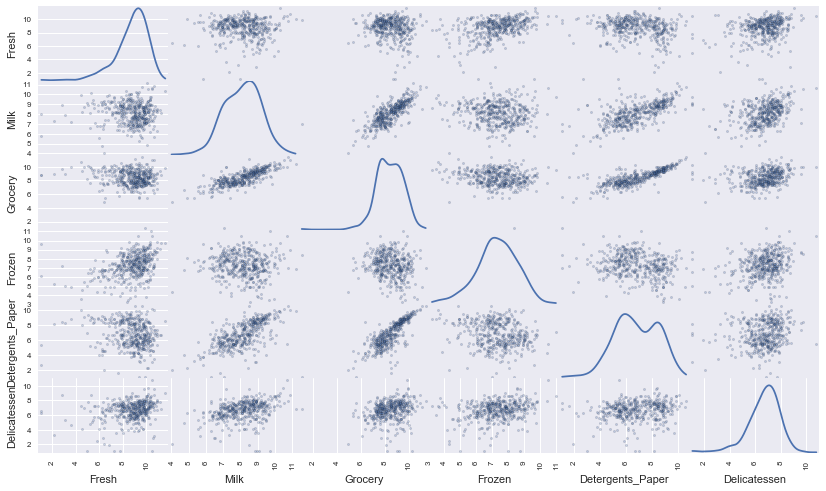

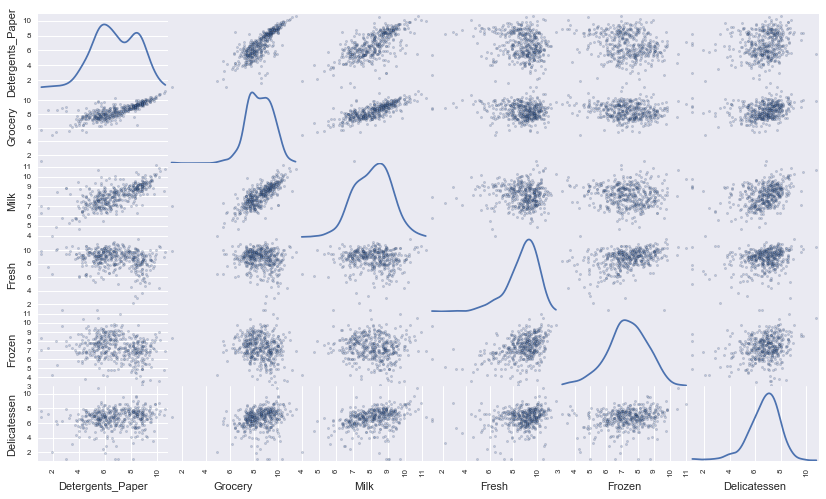

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
pd.scatter_matrix(log_data[ix_reord], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

corr_reord_log = log_data[ix_reord].corr()
for i in range(log_data.shape[1]):
    for j in range(i,log_data.shape[1]):
        corr_reord_log.ix[j, i] = ''
print "\nCorrelation of Features in 'Clustered' Order (log)"
display(corr_reord_log)


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
1  11.627601  10.296441   9.806316  9.725855          8.506739      9.053687
2   9.687630  10.740670  11.437986  6.933423         10.617099      7.987524

### Extra Note
The correlations of the 3 clustered features (Detergents_Paper, Grocery, and Milk) are maintained. In addition, the correlation of the other features is decreased suggesting that some of it was simply function of the original scaling. Applying logs gets rid of some of that spurious correlation.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
out_liers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    print "Feature '%s'" % feature
    x = log_data[feature]

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(x, 25)
    print "Q1 = %1.2f" % Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(x, 75)
    print "Q3 = %1.2f" % Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    print "step = %1.2f" % step
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    df_outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    #display(df_outlier) # switching this off for better graphical output
    print "Switching this off for better graphical output\n"

    # OPTIONAL: Select the indices for data points you wish to remove
    for i in df_outlier.index:
        out_liers.append(i)

s = Series(out_liers) # convert outliers into a Series object
s_vc = s.value_counts() # use value_counts method to group by same outlier index
valid = [i for i in range(log_data.shape[0]) if not(i in s_vc[s_vc>1])] # keep all indices that have at most 1 outlier feature

# Remove the outliers, if any were specified
# good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data = log_data.ix[valid,:]

print "Potential outliers = ", len(s_vc)
print "'True' outliers"
print s_vc[s_vc>1]

print "Original data = ", log_data.shape[0]
print "Data without outliers = ", good_data.shape[0]


Feature 'Fresh'
Q1 = 8.05
Q3 = 9.74
step = 2.53
Data points considered outliers for the feature 'Fresh':
Switching this off for better graphical output

Feature 'Milk'
Q1 = 7.33
Q3 = 8.88
step = 2.32
Data points considered outliers for the feature 'Milk':
Switching this off for better graphical output

Feature 'Grocery'
Q1 = 7.67
Q3 = 9.27
step = 2.40
Data points considered outliers for the feature 'Grocery':
Switching this off for better graphical output

Feature 'Frozen'
Q1 = 6.61
Q3 = 8.18
step = 2.35
Data points considered outliers for the feature 'Frozen':
Switching this off for better graphical output

Feature 'Detergents_Paper'
Q1 = 5.55
Q3 = 8.27
step = 4.09
Data points considered outliers for the feature 'Detergents_Paper':
Switching this off for better graphical output

Feature 'Delicatessen'
Q1 = 6.01
Q3 = 7.51
step = 2.24
Data points considered outliers for the feature 'Delicatessen':
Switching this off for better graphical output

Potential outliers =  42
'True' outliers
1

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
There are 42 potential outliers (unique customers). Out of those (#154) is an outlier in as many as 3 features. Another four are outliers are outliers in 2 features. The remaining 37 are outliers in only one feature.
I suggest we remove only those top 5 outliers (the ones with more than 1 feature being an outlier): 154, 66, 75, 128, and 65.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Cumulative explained variance

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64




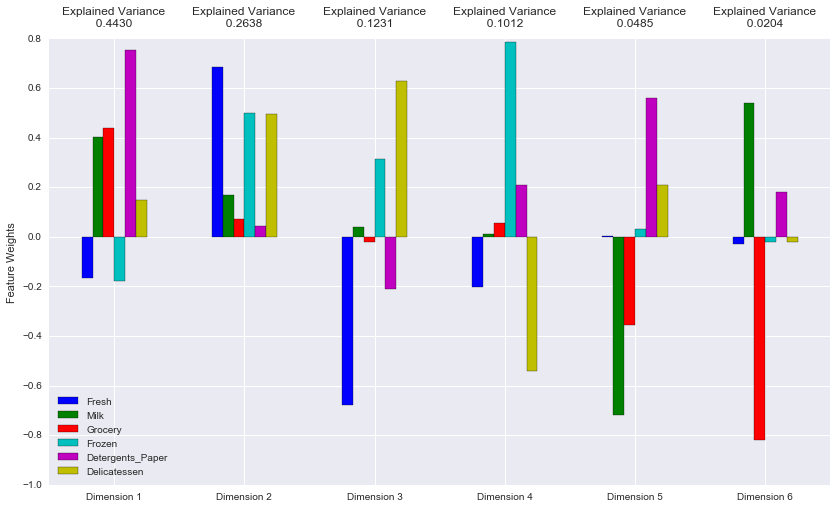

In [10]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])
pca_all = pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca_all.transform(log_samples)

# Generate PCA results plot
# print type(rs)
pca_results = rs.pca_results(good_data, pca_all)
pca_results

print "Cumulative explained variance\n"
print pca_results['Explained Variance'].cumsum()
print "\n"


## Check that data is de-meaned

#good_data_demean = good_data - good_data.mean()
#pca_results_demean = rs.pca_results(good_data_demean, pca)
#pca_results_demean

# The parameter 'whiten' in PCA will control the rescaling of data by their variance (really n_samples * singular values)
# source: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# In this case the variances are close (see below) so I will keep the pca 'whiten' to its default value

    

In [11]:
print "Most important factors (by row) explaining a particular feature (by column)"
display(F)

print "\nStandard deviation of log features"
print log_data.std()

Most important factors (by row) explaining a particular feature (by column)


Expl. Fresh  Expl. Milk  Expl. Grocery  Expl. Frozen  \
Delicatessen         0.124946    0.132214       0.012718      0.447727   
Detergents_Paper     0.090729    0.481405       0.869877      0.162431   
Fresh                     NaN    0.146786       0.028130      0.205889   
Frozen               0.459906    0.011797       0.024750           NaN   
Grocery              0.145088    0.227798            NaN      0.067078   
Milk                 0.179331         NaN       0.064525      0.116875   

                  Expl. Detergents_Paper  Expl. Delicatessen  
Delicatessen                    0.022940                 NaN  
Detergents_Paper                     NaN            0.069690  
Fresh                           0.030676            0.119654  
Frozen                          0.015813            0.673129  
Grocery                         0.904053            0.061245  
Milk                            0.026518            0.076283


Standard deviation of log features
Fresh               1.480071
Milk                1.081365
Grocery             1.116172
Frozen              1.284540
Detergents_Paper    1.721020
Delicatessen        1.310832
dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
The first 2 components combined explain 71% of the variance. The first 4 explain 93%.

- PC1 (Dimension 1):
   - The first dimension is given by mostly Detergents_paper as well as Milk and Grocery, consistent with the 'cluster identified above. It is almost a scaled mean of them (it would be the exact mean if the feature weights for those 3 were exactly equal and all the others were 0

- PC2 (Dimension 2):
   - The second dimension is given by Fresh, Frozen, and Delicatessen, which are the complement of the features determining the first dimension. This would suggest somewhat of another another cluster. I would be careful in calling it a cluster because, as evidenced from correlation analysis, these features and not highly correlated. By this I mean that the 3 features in Dimension 1 can be thought of substitues of one another. For the other 'group' of 3 features it is less clear.

- PC3 (Dimension 3):
   - The third dimension is interesting and reflects somewhat of a choice. Along the positive direction the customer would prefer Delicatessen vs. Fresh. Along the negative direction we'd have the opposite. With a bit of a stretch maybe it reflects health consciousness: either load up on higher-cal foods or go for fresh foods. 

- PC4 (Dimension 4):
   - The fourth dimension is similarly reflecting a choice of Frozen vs. Delicatessen. Also note that the variance explained by PC3 and PC4 is almost the same. One can then interpret these two dimensions as being equally important and that they reflect choices, e.g. PC3+PC4 = less Frozen and more Fresh (Delicatessen washes out). 



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# This gives me an error:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(log_samples, 4)))
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))



Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   1.0986   7.9793   8.7407  6.0868            5.4072        6.5639
1  11.6276  10.2964   9.8063  9.7259            8.5067        9.0537
2   9.6876  10.7407  11.4380  6.9334           10.6171        7.9875

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       0.5023      -6.0080       5.0055       0.3870      -0.8576   
1       2.1899       4.8605       0.0008       0.4827      -0.5041   
2       5.3316       1.8845      -0.6957      -0.1972      -0.5461   

   Dimension 6  
0      -0.3129  
1       0.1988  
2      -0.3802

Note:

The first customer is a bit mixed, but the second customer is highly concentrated in dimension 2, whereas the 3rd is highly concentrated in dimension 1. The third customer's representation in the original feature space, i.e. Fresh, Milk, etc., has no partcular pattern standing out. All the values are high, ranging from 6.9 to 11.4. Whereas in the transformed PCA space, it is much clearer that customer 3 'belongs' to the first dimension of the PCA (is explained by PC1). 

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

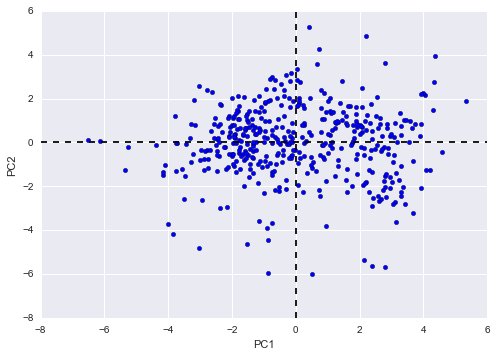

In [13]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca_all2 = pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca_all2.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples  = pca_all2.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

from matplotlib import pyplot as pl
pl.scatter(reduced_data.ix[:,0], reduced_data.ix[:,1]);
pl.xlabel('PC1');
pl.ylabel('PC2');
pl.axhline(0, color='k', linestyle='--');
pl.axvline(0, color='k', linestyle='--');


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       0.5023      -6.0080
1       2.1899       4.8605
2       5.3316       1.8845

The PCA vectors are actually the same, independent on how many components we use (parameter 'n_components' in PCA). The only difference is that if we try to reconstruct the data using only the first two components we will lose part of the information (about 30% of variance since PC1 and PC2 explain about 70%).

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

- K-means

   - Pro: scalable (can be used with large sample data), intuitive
   - Con: flat geometry, not too many clusters, assume same variance of the clusters
   - Source: http://scikit-learn.org/stable/modules/clustering.html


- Gaussian Mixture Model

   - Pro: speed and doesn't bias cluster size, clusters can have different variances, probabilistic classification
   - Con: covariance matrix might be difficult to determine if there is not sufficient data; it will use all components; clusters have a specific shape (ellipsoids). I assume it will not be great for non-convex clusters; assumes data is Gaussian
   - Source: http://scikit-learn.org/stable/modules/mixture.html


Given that the data set is small (thus no speed/size issues) and so is the numbers of clusters, I would not see a particular drawback in using either. In addition, since the marginal variances of log data are comparable k-means should be fine. I would slightly prefer k-means, mostly because I need to pick one and it might be slightly more intuitive.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

Fitting with # clusters = 2
Score (# clusters = 2) = 0.43
Fitting with # clusters = 3
Score (# clusters = 3) = 0.40
Fitting with # clusters = 4
Score (# clusters = 4) = 0.33
Fitting with # clusters = 5
Score (# clusters = 5) = 0.35
Fitting with # clusters = 6
Score (# clusters = 6) = 0.36


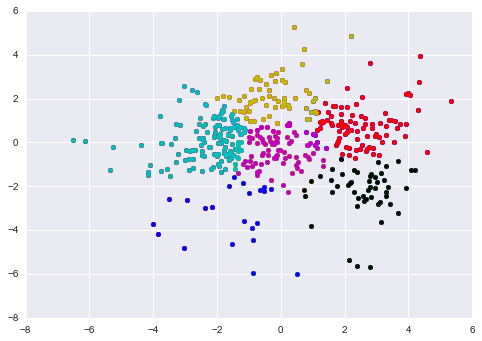

In [15]:
# K-Means

# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 4, 5, 6]
nC = len(n_clusters)
score = np.zeros((nC, 1))
clr = ['r', 'b', 'y', 'm', 'c', 'k']

for i, n_cl in enumerate(n_clusters):
    print "Fitting with # clusters = %i" % n_cl
    clf = KMeans(init='k-means++', n_clusters=n_cl, n_jobs=-1)
    clf.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clf.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clf.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clf.predict(pca_samples)

    for j in range(n_cl):
        ix = preds==j
        pl.scatter(reduced_data.ix[ix,0], reduced_data.ix[ix,1], color=clr[j])

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score[i] = silhouette_score(reduced_data, clf.labels_)
    print "Score (# clusters = %i) = %1.2f" % (n_cl, score[i])

Fitting with # clusters = 2


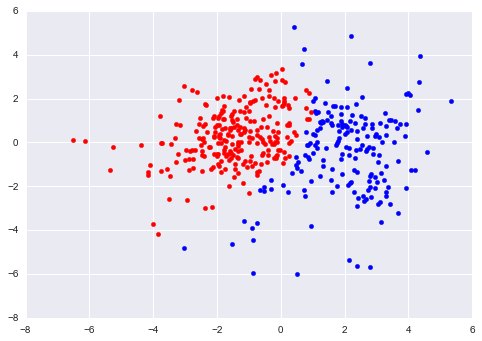

Score (# clusters = 2) = 0.41
AIC score (# clusters = 2) = 3525.50
BIC score (# clusters = 2) = 3570.33
Fitting with # clusters = 3


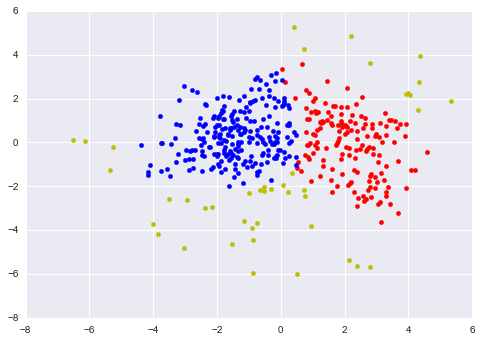

Score (# clusters = 3) = 0.40
AIC score (# clusters = 3) = 3503.64
BIC score (# clusters = 3) = 3572.92
Fitting with # clusters = 4


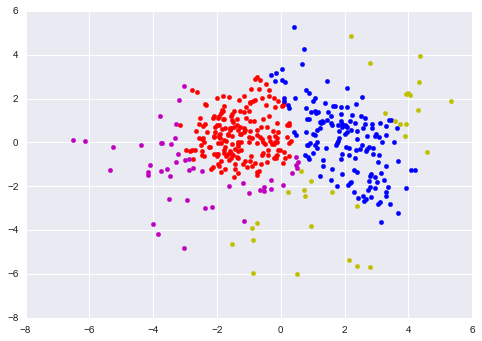

Score (# clusters = 4) = 0.29
AIC score (# clusters = 4) = 3509.67
BIC score (# clusters = 4) = 3603.40
Fitting with # clusters = 5


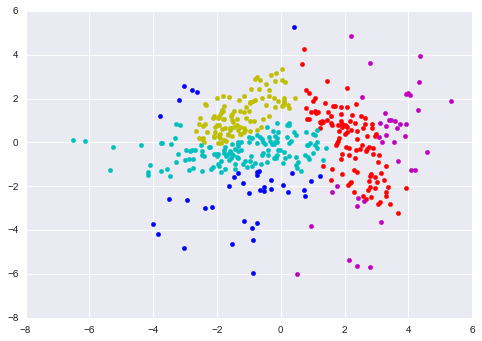

Score (# clusters = 5) = 0.19
AIC score (# clusters = 5) = 3493.47
BIC score (# clusters = 5) = 3611.66
Fitting with # clusters = 6


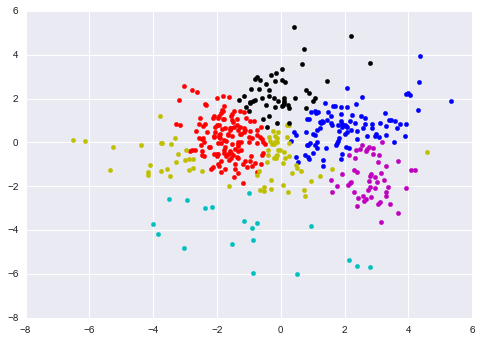

Score (# clusters = 6) = 0.28
AIC score (# clusters = 6) = 3494.03
BIC score (# clusters = 6) = 3636.67


aicGMM       bicGMM
2  3525.499412  3570.328219
3  3503.635485  3572.916367
4  3509.669798  3603.402757
5  3493.473533  3611.658568
6  3494.034966  3636.672077

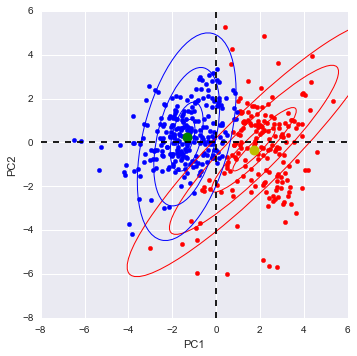

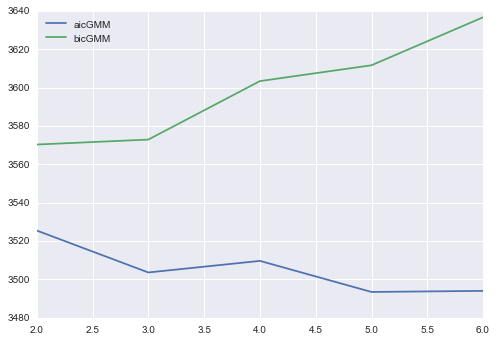

In [17]:
# GMM

from sklearn import mixture
clfGMM = mixture.GMM(n_components=2,covariance_type='full')
aicGMM = np.zeros_like(score)
bicGMM = np.zeros_like(score)
scoreGMM = np.zeros_like(score)
for i, n_cl in enumerate(n_clusters):
    print "Fitting with # clusters = %i" % n_cl
    clfGMM = mixture.GMM(n_components=n_cl, covariance_type='full')
    clfGMM.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clfGMM.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clfGMM.means_
    covars  = clfGMM.covars_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clfGMM.predict(pca_samples)

    for j in range(n_cl):
        ix = preds==j
        pl.scatter(reduced_data.ix[ix,0], reduced_data.ix[ix,1], color=clr[j])
    pl.show()

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    # Find out how you get the classification, is it via prob_a?
    scoreGMM[i] = silhouette_score(reduced_data, preds)
    print "Score (# clusters = %i) = %1.2f" % (n_cl, scoreGMM[i])
    aicGMM[i] = clfGMM.aic(reduced_data)
    bicGMM[i] = clfGMM.bic(reduced_data)
    print "AIC score (# clusters = %i) = %1.2f" % (n_cl, aicGMM[i])
    print "BIC score (# clusters = %i) = %1.2f" % (n_cl, bicGMM[i])

df_scoreGMM = DataFrame({'aicGMM': aicGMM[:,0], 'bicGMM': bicGMM[:,0]}, index=n_clusters)

# You want minimum AIC or BIC


# Choose optimal

n_cl_optGMM = 2
clfGMM = mixture.GMM(n_components=n_cl_optGMM, covariance_type='full')
clfGMM.fit(reduced_data)
preds = clfGMM.predict(reduced_data)
centers = clfGMM.means_
covars  = clfGMM.covars_


# Display data

# Scatter
from matplotlib.patches import Ellipse
ax = pl.subplot(111, aspect='equal')
for j in range(n_cl_optGMM):
    ix = preds==j
    ax.scatter(reduced_data.ix[ix,0], reduced_data.ix[ix,1], color=clr[j])
    lam2, v = np.linalg.eig(covars[:,:,j])
    lam = np.sqrt(lam2)
    for k in [1, 2, 4, 6]:
        ell = Ellipse(xy=centers[j,:],
                  width=k*lam2[0], height=k*lam[1],
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  lw=1, color=clr[j])
        ell.set_facecolor('none')
        ax.add_artist(ell)


pl.plot(centers[0,0], centers[0,1], 'yo', markersize=10)
pl.plot(centers[1,0], centers[1,1], 'go', markersize=10)
pl.xlabel('PC1');
pl.ylabel('PC2');
pl.axhline(0, color='k', linestyle='--');
pl.axvline(0, color='k', linestyle='--');


display(df_scoreGMM)
df_scoreGMM.plot()


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The best silhouette score is 0.43 with 2 clusters.

After feedback from the last review I added an analysis with GMM. Using AIC and BIC criterion would yield different choices of optimal number of clusters. However, according to the silhouette measure for GMM we would also infer that 2 clusters is the best choice.


Fitting with # clusters = 2
Score (# clusters = 2) = 0.43


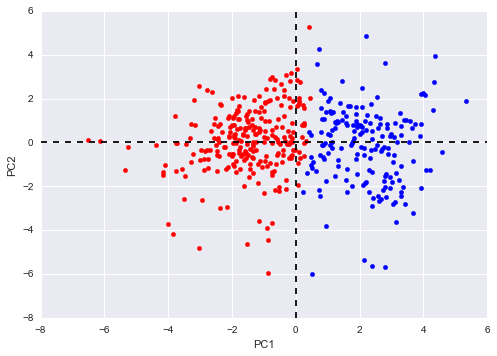

In [18]:
n_cl = 2

print "Fitting with # clusters = %i" % n_cl
clf = KMeans(init='k-means++', n_clusters=n_cl, n_jobs=-1)
clf.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clf.predict(reduced_data)

# TODO: Find the cluster centers
centers = clf.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clf.predict(pca_samples)

for j in range(n_cl):
    ix = preds==j
    pl.scatter(reduced_data.ix[ix,0], reduced_data.ix[ix,1], color=clr[j])
pl.xlabel('PC1');
pl.ylabel('PC2');
pl.axhline(0, color='k', linestyle='--');
pl.axvline(0, color='k', linestyle='--');


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_opt = silhouette_score(reduced_data, clf.labels_)
print "Score (# clusters = %i) = %1.2f" % (n_cl, score_opt)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

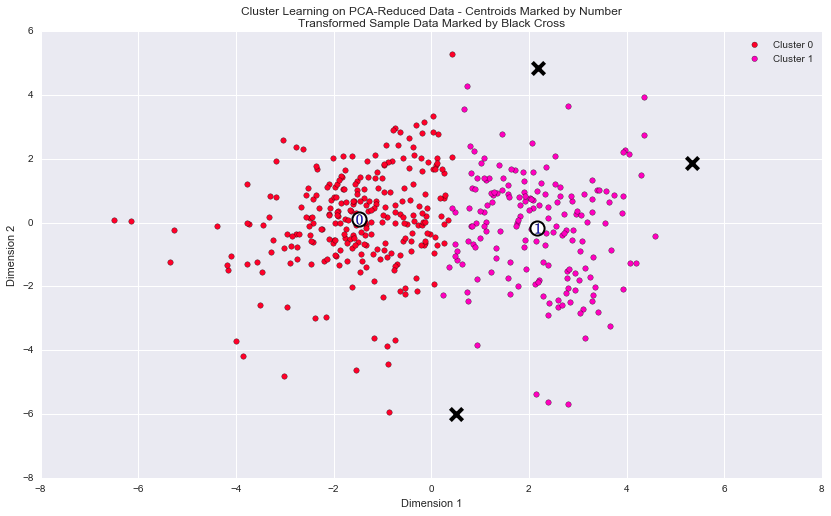

In [19]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca_all2.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
means = np.round(data.mean())
med = np.round(data.median())
print "\nMean"
display(means)
print "\nMedian"
display(med)
print "\nTotal spending:"
display(np.round(true_centers.sum(axis=1)))

print "\nSpending compared to median"
display(true_centers - med)

print "\nSpending compared to mean"
display(true_centers - means)


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   8867  1897     2477    2088               294           681
Segment 1   4005  7900    12104     952              4561          1036


Mean


Fresh               12000
Milk                 5796
Grocery              7951
Frozen               3072
Detergents_Paper     2881
Delicatessen         1525
dtype: float64


Median


Fresh               8504
Milk                3627
Grocery             4756
Frozen              1526
Detergents_Paper     816
Delicatessen         966
dtype: float64


Total spending:


Segment 0    16304
Segment 1    30558
dtype: float64


Spending compared to median


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0    363 -1730    -2279     562              -522          -285
Segment 1  -4499  4273     7348    -574              3745            70


Spending compared to mean


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  -3133 -3899    -5474    -984             -2587          -844
Segment 1  -7995  2104     4153   -2120              1680          -489

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 is described by a customer that buys more stuff (about twice as much than Segment 1) but mostly in everything but Fresh and Frozen that are purchased in much less quantity than the average (or median). On the contrary the customer buys a lot more Detergents_paper than the average. Segment 0 could be reflective of a generic (non-food) related store. It could be something like a pharmacy or a convenience store.

Segment 1 on the other hand could be a dedicated food store. It buys a more Fresh and Frozen than the median. As a side, note that he also buys less than the mean in any category. I picked the median to remove the strong skew.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [21]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

I would start with the third customer because it is the most clear-cut. The classification makes sense since he loaded up on Grocery and Detergents_paper. This is also consistent with the PCA projection (it's the cross to the most right side of the chart).

The first customer is a low spender but comparatively very concentrated on Milk and Grocery, so it does make sense that he would be classified as 0, although the high Frozen compared to Detergents_paper casts some doubts. 

The second customer is the hardest. He has high Fresh (10x the mean) and Frozen (5x the mean) but also high Grocery (2x) and high Milk (4x) and Detergents_paper (2x).  All-in-all it would seem more a egment 1 type of customer.


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

Since Segment 0 spends a lot more than Segment 1, I would focus on Segment 1. Targeting specific stores (food-related stores) would select the smaller subset of customers with reduced impact. The A/B test would be to:
- Run the 5 days service on all customers for 1 week ('A') then
- Run the 3 day service only for Segment 1 customers and 5 day service for Segment 0 ('B')
- Use results on Segment 0 for test A and B, both of which had a 5 day service to normalize results
- Compare results of Segment 1 on a thus-normalized basis

This explanation is a bit vague on the selection of Segment 0 vs. Segment 1 customers, as if one could know. In reality (and fortunately) since this is a delivery service the provider should know which store they are delivering from. According to the previous analysis, we would simply need to classify the store into 0 (non-food specific) or 1 (food specific).

Alternatively, one could use only Segment 1 customers by running 5 day delivery and 3 day delivery on alternative weeks.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

I am still not 100% sure I understand the question. Please see below for previous trials.

One could use the PCA features as new inputs into a supervised learner.


**Previous Answer:**

The question asks for a new feature in general. I am not sure the following answers the question, but here is my interpretation.

Any piece of information that helps identifying the type of store would help. The analysis above suggests that customers' spending habits fall into 2 categories. These categories could essentially split the universe of stores into two classes (this is maybe likely, but not necessary: one can think of a world were therea are only 'giga'-stores that provide any product but customers could still purchase different things from different stores, e.g. for quality reasons). We know or we are suggesting that there are two such classes but we don't know which one they are. If we could gather more information on the store it would help us solidify the analysis. This is also quite important in practice since when a new customer comes we wouldn't know how to classify him in advance, which is necessary if we want to be selective on the delivery service option we want to offer (5 day or 3 day). However, we would be able to make that distinction if we knew where he needs the delivery from. Otherwise we could only distinguish if we knew his spending habit.

Also (and maybe this was the question), suppose we had a supervised problem where the features are the 6 above and the target were the type of store (only one of two types). One could first run an unsupervised learning algo on the features (as we did so far) and potentially come up with clusters. To the degree to which those clusters coincide with the targets it will inform the data scientist on the likelyhood of success of the supervised algo. Suppose for example that we we obtained two neatly separated clusters, let's say a ball of points on the right and a ball on the left. Suppose the targets were not such that the ball on the left was one class and the one on the right the other, but instead the targets would split each ball into two hemispheres so that the upper hemisphere of each ball corresponded to one class and the lower to the other. In that case the supervised learning algorithm would have a much harder time, because it means that it will need to be able to distinguish two points that are quite similar in the original space but belong to different classes in the target space (these would be the points close to the equator in the two balls).

If we were to predict churning, we might want to measure the degree of tolerance for less frequent delivery. Depending on the product type if there were information on delivery options (overnight, 2-day shipping, and standard shipping) that might tells us something. For example, customers who use overnight shipping would proabably churn with a 3-day delivery system.

Another measure could be the frequency of delivery, for repeated customers. A customer that receives more deleveries of lower volume might be more invclined to churn than a customer buying less frequently and in bulk.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

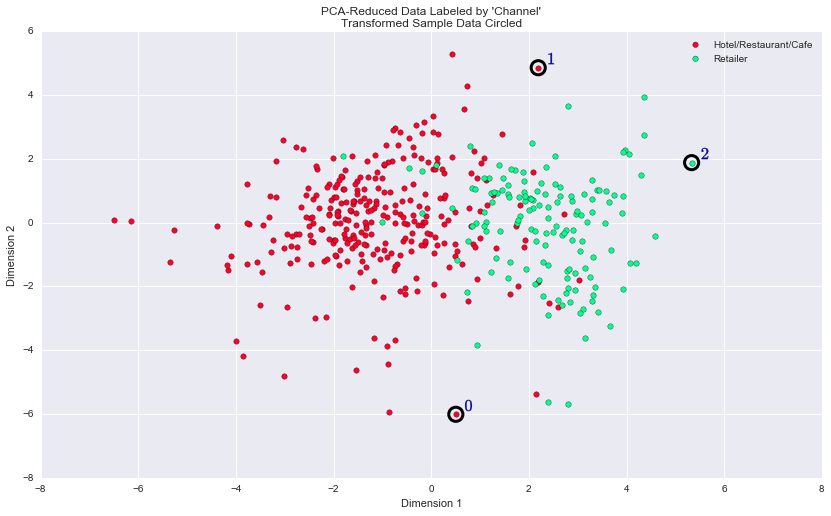

In [19]:
# Display the clustering results based on 'Channel' data
outliers = [154, 66, 75, 128, 65] # from analysis above
rs.channel_results(reduced_data, outliers, pca_samples)
#rs.channel_results(reduced_data, list(out_liers), pca_samples)


### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm did a good job in finding the clusters and a total of 2 clsuters seems an appropriate choice. The correspondence between the suggested clusters and the Channel is 1-to-1: Retailers is Segment 0 and Hotels/Restaurant/Cafe is Segment 1. The clusters do not purely coincide with the Channel label because of mixture of points closer to the boundary. Certainly the third customer is classified consistently. The other two are quite close to the (fuzzy) boundary and I am not very surprised that they belog to a different label.

As a final note, this fits well with the discussion of clusters in the (unsupervised) features and supervised classification. As evidenced by the figure in this example they correspond quite well.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.